Successfully loaded data from E:/data_for_seg/
False
False
Fitting 5 folds for each of 100 candidates, totalling 500 fits


One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]


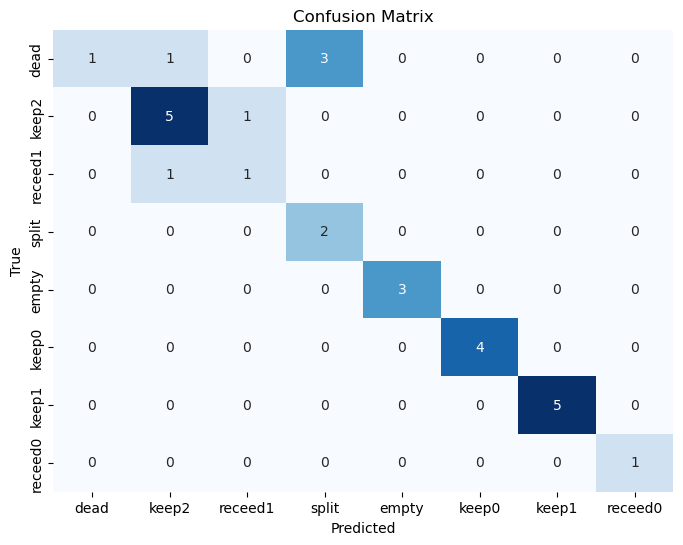

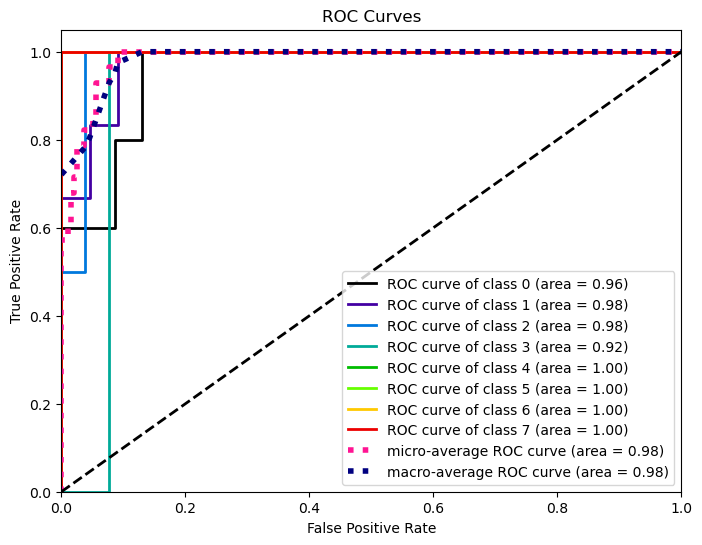

ROC AUC Score: 0.9797050775311645
Best Hyperparameters:
{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 65}


In [4]:
from importlib import reload
import utility
reload(utility)
from utility import get_hard_disk_path, load_data, run_randomsearch_random_forest, evaluate_gridsearch

X, y, unique_labels, label_mapping, _ = load_data(get_hard_disk_path())
grid_search, X_test, y_test = run_randomsearch_random_forest(X, y, random_state=30)
auc_score, best_params = evaluate_gridsearch(grid_search, X_test, y_test, unique_labels)
print(f"ROC AUC Score: {auc_score}")
print("Best Hyperparameters:")
print(best_params)

In [5]:
from xgboost import plot_importance

# Plot feature importance
plot_importance(classifier)
plt.show()

NameError: name 'classifier' is not defined

Successfully loaded data from E:/data_for_seg_without_dead/


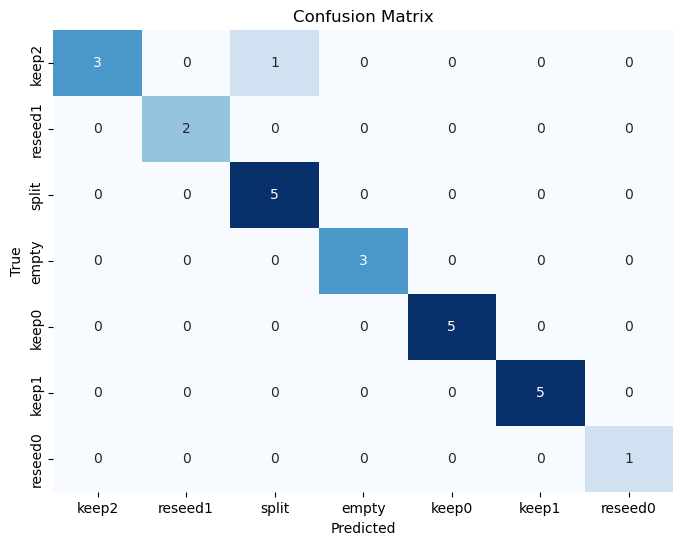

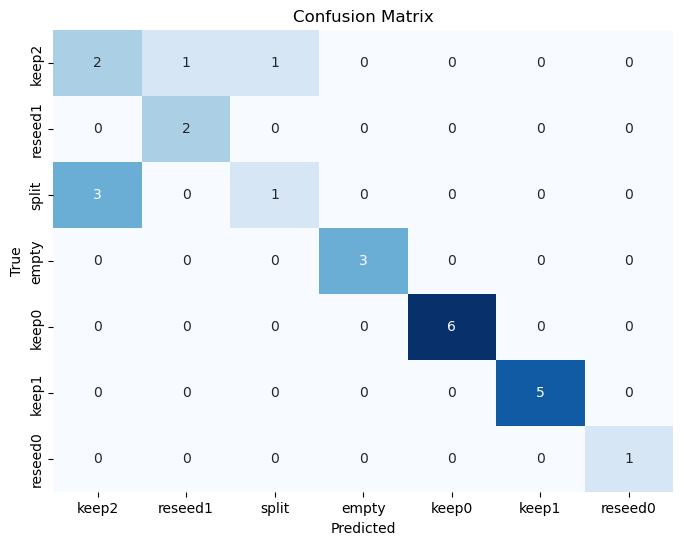

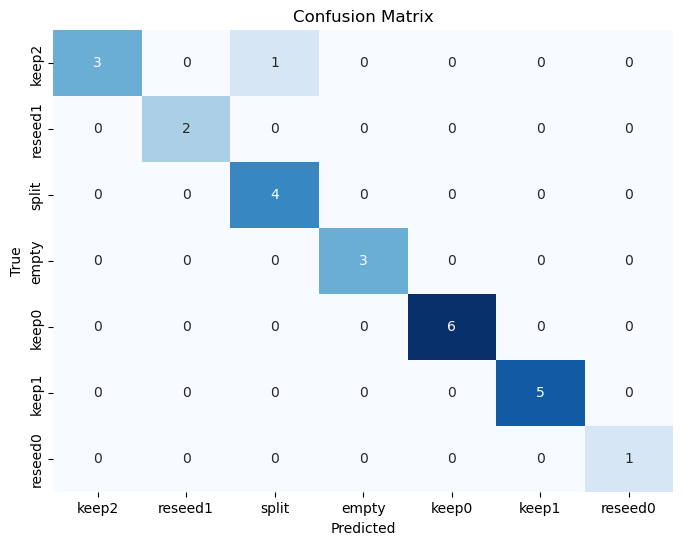

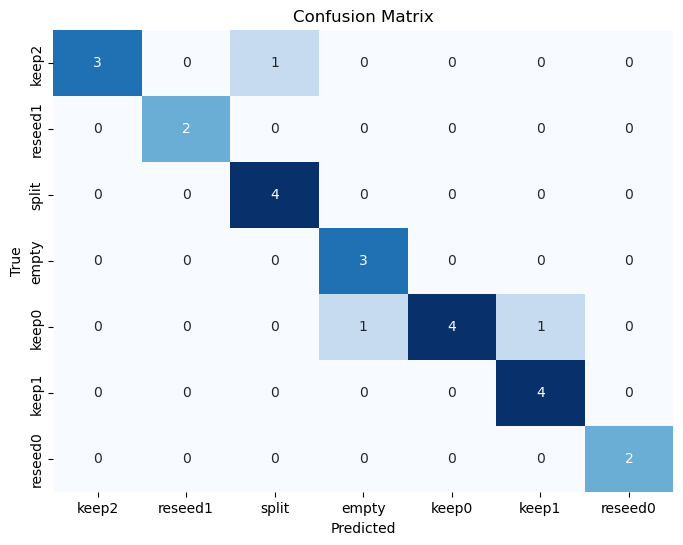

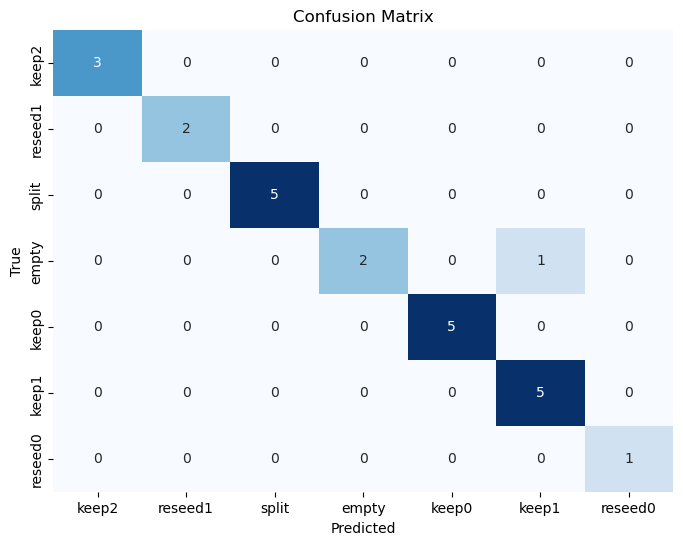

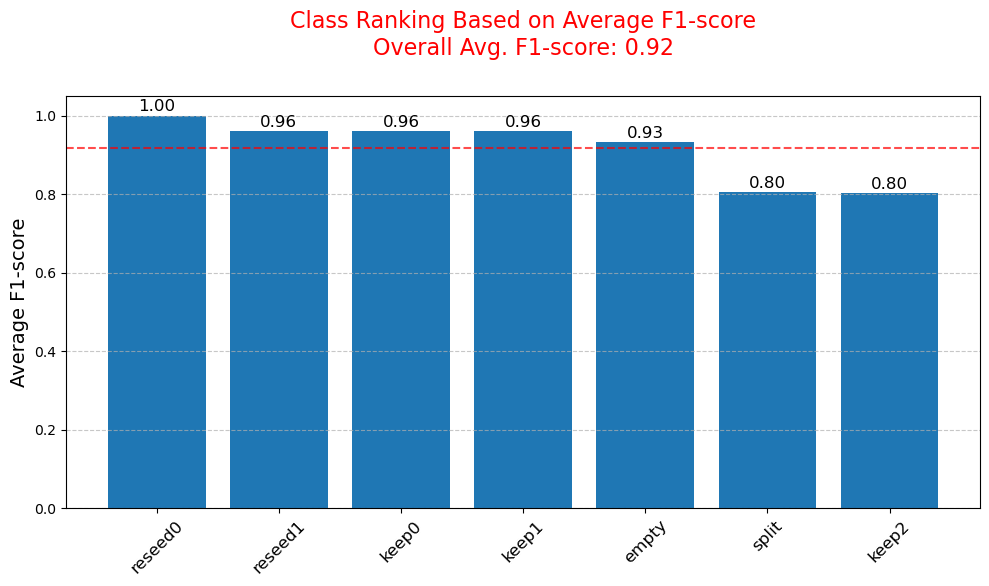

In [1]:
from importlib import reload
import utility
reload(utility)
from utility import load_data, plot_confusion_matrix, plot_average_f1_scores, train_model, get_classification_details, get_hard_disk_path, show_samples
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score

random_state = 42

X, y, unique_labels, label_mapping, data = load_data(get_hard_disk_path("segmentation_without_dead"), "statistics_features_IP.csv")
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
fold_results = []
cumulative_f1_scores = {label: 0 for label in unique_labels}

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Impute missing values with the mean of the column
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)
    classifier = train_model(X_train, y_train, unique_labels, "RandomForest")
    y_pred = classifier.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, unique_labels)
    #wellclassified_samples, misclassified_samples = get_classification_details(y_test, y_pred, data)
    #show_samples(get_hard_disk_path(), samples=wellclassified_samples, title="Correctly classified")
    #show_samples(get_hard_disk_path(), samples=misclassified_samples, title="Misclassified")

    # Additional operations you had for misclassified and wellclassified samples go here...

    f1_scores_per_class = f1_score(y_test, y_pred, average=None)
    for idx, label in enumerate(unique_labels):
        cumulative_f1_scores[label] += f1_scores_per_class[idx]

average_f1_scores = {label: score/5 for label, score in cumulative_f1_scores.items()} 
ranked_labels = sorted(average_f1_scores, key=average_f1_scores.get, reverse=True)
plot_average_f1_scores(ranked_labels, average_f1_scores)